# Fitness experimental agreement

Here I compare the agreement between the results of different DMS studies on the same protein.

In [1]:
import pandas as pd

df = pd.read_csv('/home/saul/master_thesis_work/dataset/dms/dms_training.csv')
df

/home/saul/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,protein,dms_id,uniprot_id,position,aa1,aa2,reported_fitness,pdb_id,pdb_chain,author_year,...,hmm_pssm_aa1_likelyhood,hmm_pssm_aa2_likelyhood,hmm_pssm_delta_likelyhood,tr_rosetta_feature_index,tr_rosetta_graph_closeness_centrality,tr_rosetta_graph_betweenness_centrality,tr_rosetta_graph_degree_centrality,tr_rosetta_graph_load_centrality,tr_rosetta_graph_harmonic_centrality,tr_rosetta_graph_clustering
0,TEM-1,beta-lactamase,P62593,20,P,P,0.581033,1btl,A,Firnberg2014,...,2.81126,2.81126,0.00000,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
1,TEM-1,beta-lactamase,P62593,20,P,Q,0.441480,1btl,A,Firnberg2014,...,2.81126,3.27353,0.46227,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
2,TEM-1,beta-lactamase,P62593,20,P,D,0.289750,1btl,A,Firnberg2014,...,2.81126,2.92236,0.11110,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
3,TEM-1,beta-lactamase,P62593,20,P,K,0.196582,1btl,A,Firnberg2014,...,2.81126,2.72602,-0.08524,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
4,TEM-1,beta-lactamase,P62593,20,P,N,0.053725,1btl,A,Firnberg2014,...,2.81126,3.00679,0.19553,19,0.150237,0.008805,0.021053,0.014844,0.53203,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21837,Yap65,WW_domain,P46937,203,R,C,-2.667780,4rex,A,Fowler2010,...,0.59945,5.62776,5.02831,36,0.336134,0.011106,0.150000,0.010839,0.17050,0.800000
21838,Yap65,WW_domain,P46937,203,R,G,-2.731940,4rex,A,Fowler2010,...,0.59945,3.26877,2.66932,36,0.336134,0.011106,0.150000,0.010839,0.17050,0.800000
21839,Yap65,WW_domain,P46937,203,R,D,-2.850370,4rex,A,Fowler2010,...,0.59945,3.95240,3.35295,36,0.336134,0.011106,0.150000,0.010839,0.17050,0.800000
21840,Yap65,WW_domain,P46937,203,R,H,-3.011270,4rex,A,Fowler2010,...,0.59945,4.16162,3.56217,36,0.336134,0.011106,0.150000,0.010839,0.17050,0.800000


Pearson: (0.5760274214106809, 1.771177554508783e-91)
Spearman: SpearmanrResult(correlation=0.43866345916804567, pvalue=2.3447991825520014e-49)


/usr/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


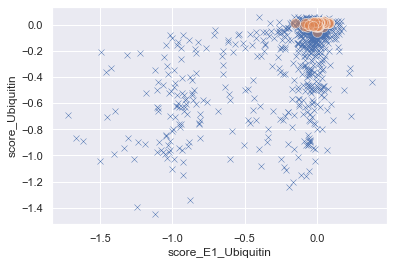

In [2]:
import pandas as pd
import seaborn as sns; sns.set()
import itertools
from scipy import stats
import matplotlib.pyplot as plt

for protein in set(df.protein):
    if len(set(df[df.protein == protein].dms_id)) <= 1:
        continue
    protein_df = df[df.protein == protein][['position', 'aa1', 'aa2']].drop_duplicates()
    columns_to_compare = []
    for study in set(df[df.protein == protein].dms_id):
        columns_to_compare.append('score_'+study)
        study_df = df[df.dms_id == study][['position', 'aa1', 'aa2']]
        study_df['score_'+study] = df[df.dms_id == study].reported_fitness
        protein_df = protein_df.merge(study_df)
    is_wt = (protein_df.aa1 == protein_df.aa2)
    for x,y in itertools.combinations(columns_to_compare, 2):
        print('Pearson:', stats.pearsonr(protein_df[x], protein_df[y]))
        print('Spearman:', stats.spearmanr(protein_df[x], protein_df[y]))
        plt.close()
        sns.scatterplot(x=protein_df[x][~is_wt],
                        y=protein_df[y][~is_wt],
                        marker='x')
        sns.scatterplot(x=protein_df[x][is_wt],
                        y=protein_df[y][is_wt],
                        s=100,
                        alpha=0.5)
        plt.show()

In [3]:
protein_df

,position,aa1,aa2,score_E1_Ubiquitin,score_Ubiquitin
0,2,Q,C,0.379742,-0.44
1,2,Q,G,0.232376,-0.70
2,2,Q,S,0.229633,-0.33
3,2,Q,T,0.217859,-0.37
4,2,Q,P,0.069747,-0.96
...,...,...,...,...,...
1018,10,G,H,-0.934125,-0.52
1019,10,G,E,-0.952248,-0.76
1020,10,G,R,-0.984380,-0.71
1021,10,G,Q,-1.026853,-0.38


In [6]:
df[(df.position == 2) & (df.aa1 == 'Q') & (df.aa2 == 'C')]

,protein,dms_id,uniprot_id,position,aa1,aa2,reported_fitness,pdb_id,pdb_chain,author_year,...,hmm_pssm_aa1_likelyhood,hmm_pssm_aa2_likelyhood,hmm_pssm_delta_likelyhood,tr_rosetta_feature_index,tr_rosetta_graph_closeness_centrality,tr_rosetta_graph_betweenness_centrality,tr_rosetta_graph_degree_centrality,tr_rosetta_graph_load_centrality,tr_rosetta_graph_harmonic_centrality,tr_rosetta_graph_clustering
5397,UBI4,E1_Ubiquitin,P0CG63,2,Q,C,0.379742,3olm,D,Roscoe2014,...,1.95737,4.63916,2.68179,1,0.353774,0.01293,0.133333,0.013557,0.328167,0.533333
5414,UBI4,Ubiquitin,P0CG63,2,Q,C,-0.440000,3olm,D,Roscoe2013,...,1.95737,4.63916,2.68179,1,0.353774,0.01293,0.133333,0.013557,0.328167,0.533333
